In [19]:
import matplotlib.pyplot as plt
import numpy as np
import os 
import re
plt.style.use('ggplot')

In [1]:
def parseProtFile(fileName):
    """ 
    Parses a FeatFloWer protocol file (usually called prot.txt) 
    for the default keywords and extracts the values
    """
    with open(fileName, "r") as f:
        lines = f.readlines()
    
    time = []
    vel = []
    pos = []
    force = []
    for line in lines:
        m = re.search("PartVel:", line)
        if m != None:
            splitLine = line.split()
            time.append(splitLine[4])
            vel.append(splitLine[3])
        m = re.search("Position:", line)
        if m != None:
            splitLine = line.split()
            pos.append(splitLine[3])
        m = re.search("ResistanceForce:", line)
        if m != None:
            splitLine = line.split()
            force.append(splitLine[3])
    time = [float(x) for x in time]
    vel = [float(x) for x in vel]
    pos = [float(x) for x in pos]
    force = [float(x) for x in force]
    return (time, force, vel, pos)

In [15]:

def parseFormat2(fileName):
    """ 
    Parses a FeatFloWer protocol file with the 
    newer keywords
    """
    with open(fileName, "r") as f:
        lines = f.readlines()
    
    timen = []
    veln = []
    posn = []
    forcen = []
    for line in lines:
        m = re.search("Velocity:", line)
        if m != None:
            splitLine = line.split()
            timen.append(splitLine[4])
            veln.append(splitLine[3])
        m = re.search("Position:", line)
        if m != None:
            splitLine = line.split()
            posn.append(splitLine[3])
        m = re.search("\)force:", line)
        if m != None:
            splitLine = line.split(',')
            forcen.append(splitLine[2].split('>')[0])
    timen = [float(x) for x in timen]
    veln = [float(x) for x in veln]
    posn = [float(x) for x in posn]
    forcen = [float(x) for x in forcen]
    print("Length:", len(timen), len(veln), len(posn))
    return (timen, veln, posn, forcen)

In [29]:
timen, veln, posn, forcen = parseFormat2("old_result.txt")
syncf1Data = (np.array([timen, forcen, veln, posn])).transpose()

np.savetxt("sync_force1.txt", syncf1Data)

Length: 1100 1100 1100


In [30]:
#time3, vel3, pos3, force3 = parseFormat2("approach2.txt")
syncf2Data = (np.array([time3, force3, vel3, pos3])).transpose()

np.savetxt("sync_force2.txt", syncf2Data)

Length: 65 65 65


In [89]:
time4, vel4, pos4, force4 = parseFormat2("damping10.txt")
syncf3Data = (np.array([time4, force4, vel4, pos4])).transpose()

np.savetxt("sync_force9.txt", syncf3Data)

Length: 1100 1100 1100


In [3]:
def loadReferenceValues():
    """ 
    Loads the reference values into python structures
    from the reference value file
    """
    refData = np.loadtxt("ref_cols.txt")
    vel2 = refData[:,2]
    time2 = refData[:,0]
    force2 = refData[:,1]
    pos2 = refData[:,3]
    return (time2, force2, vel2, pos2)

(0, -0.15)

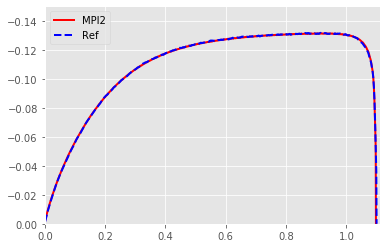

In [91]:
#plt.plot(time, vel)
#plt.plot(timen, veln)
time2, force2, vel2, pos2 = loadReferenceValues()
#plt.plot(timen, veln, color="magenta", label="MPI")
plt.plot(time4, vel4, color="red", label="MPI2", linewidth=2)
plt.plot(time2, vel2, linestyle='dashed', color="blue", label="Ref", linewidth=2)
plt.legend()
plt.xlim([0, 1.11])
plt.ylim([0, -0.15])

(0, 0.01)

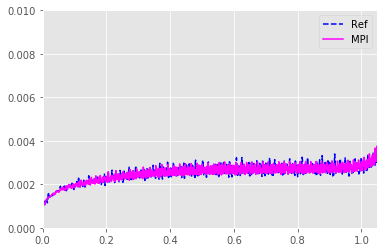

In [83]:
plt.plot(time2, force2, linestyle='dashed', color="blue", label="Ref")
plt.plot(timen, forcen, color="magenta", label="MPI")
plt.legend()
plt.xlim([0, 1.05])
plt.ylim([0, 0.01])

In [2]:
0.141071 * 9.81


1.38390651

In [5]:
vol = 1.76625e-06
effRho = 158.0
invMass = 505.51
print(1120 - 962)
print(vol * effRho * invMass)   
print(vol * effRho * invMass * 9.81)   

158
0.141071411925
1.38391055098425


In [58]:
import plotly.graph_objects as go

In [82]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=time2, y=vel2, name="Ref", line = dict(color="royalblue", dash='dash')))
fig.add_trace(go.Scatter(x=time4, y=vel4, name="MPI", line = dict(color="firebrick")))